In [1]:
!pip install pandas==1.5.3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 17.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.1.4
    Uninstalling pandas-2.1.4:
      Successfully uninstalled pandas-2.1.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires pandas>=2.0.0, but you have pandas 1.5.3 which is incompatible.


In [2]:
!pip install fastapi kaleido python-multipart uvicorn

In [3]:
!pip install pyLDAvis

  Using cached pandas-2.1.4-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.3 MB)
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 0.17.0 requires pandas<2.1.4,>=1.5.0, but you have pandas 2.1.4 which is incompatible.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.1.4 which is incompatible.


In [4]:
!pip install gensim

In [5]:
!pip install jsonlines

In [6]:
!python -m spacy download en_core_web_lg

2023-12-20 15:36:33.949305: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-20 15:36:33.949417: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-20 15:36:33.953548: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-20 15:36:33.974607: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-20 15:36:35.707559: W tensorflow/compiler/tf2

In [7]:
!pip install --upgrade numpy
!pip install --upgrade gensim


In [8]:
#spacy
import spacy
from spacy.pipeline import EntityRuler
from spacy.lang.en import English
from spacy.tokens import Doc

#gensim
import gensim
from gensim import corpora

#Visualization
from spacy import displacy
import pyLDAvis.gensim_models
from wordcloud import WordCloud
import plotly.express as px
import matplotlib.pyplot as plt

#Data loading/ Data manipulation
import pandas as pd
import numpy as np
import jsonlines

#nltk
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download(['stopwords','wordnet'])

#warning
import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [9]:
df = pd.read_csv("/content/drive/MyDrive/CvAnalysis/KaggleDataset/Resume/Resume.csv")
df = df.reindex(np.random.permutation(df.index))
data = df.copy()
data.head()

,ID,Resume_str,Resume_html,Category
1383,23841877,BISTRO CHEF Career Overview ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF
2278,46055835,6 - 8 LANGUAGE ARTS GRADE TEACHER ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS
497,23577836,CHILD PERFORMER WELFARE ADVOCATE ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE
990,26829350,BUYER Summary Over 1 yea...,"<div class=""fontsize fontface vmargins hmargin...",BPO
1080,14358578,Camryn Hilliard Professional S...,"<div class=""MPR skn-mlc1 fontsize fontface vma...",SALES


In [10]:
nlp = spacy.load("en_core_web_lg")
skill_pattern_path = "/content/drive/MyDrive/CvAnalysis/KaggleDataset/jz_skill_patterns.jsonl"

In [11]:
ruler = nlp.add_pipe("entity_ruler")
ruler.from_disk(skill_pattern_path)
nlp.pipe_names

['tok2vec',
 'tagger',
 'parser',
 'attribute_ruler',
 'lemmatizer',
 'ner',
 'entity_ruler']

In [12]:
def get_skills(text):
    doc = nlp(text)
    myset = []
    subset = []
    for ent in doc.ents:
        if ent.label_ == "SKILL":
            subset.append(ent.text)
    myset.append(subset)
    return subset


def unique_skills(x):
    return list(set(x))

In [13]:
clean = []
for i in range(data.shape[0]):
    review = re.sub(
        '(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?"',
        " ",
        data["Resume_str"].iloc[i],
    )
    review = review.lower()
    review = review.split()
    lm = WordNetLemmatizer()
    review = [
        lm.lemmatize(word)
        for word in review
        if not word in set(stopwords.words("english"))
    ]
    review = " ".join(review)
    clean.append(review)

In [14]:
data["Clean_Resume"] = clean
data["skills"] = data["Clean_Resume"].str.lower().apply(get_skills)
data["skills"] = data["skills"].apply(unique_skills)
data.head()

,ID,Resume_str,Resume_html,Category,Clean_Resume,skills
1383,23841877,BISTRO CHEF Career Overview ...,"<div class=""fontsize fontface vmargins hmargin...",CHEF,bistro chef career overview result oriented cl...,"[chef, computer science, finance, support, bus..."
2278,46055835,6 - 8 LANGUAGE ARTS GRADE TEACHER ...,"<div class=""fontsize fontface vmargins hmargin...",ARTS,6 8 language art grade teacher summary enthusi...,"[certificate, medium, business, comprehension,..."
497,23577836,CHILD PERFORMER WELFARE ADVOCATE ...,"<div class=""fontsize fontface vmargins hmargin...",ADVOCATE,child performer welfare advocate summary admin...,"[software, testing, documentation, business, d..."
990,26829350,BUYER Summary Over 1 yea...,"<div class=""fontsize fontface vmargins hmargin...",BPO,buyer summary 1 year end end experience worldw...,"[business administration, marketing, finance, ..."
1080,14358578,Camryn Hilliard Professional S...,"<div class=""MPR skn-mlc1 fontsize fontface vma...",SALES,camryn hilliard professional summary highly mo...,"[software, paw, specification, advertising, se..."


In [15]:
fig = px.histogram(
    data, x="Category", title="Distribution of Jobs Categories"
).update_xaxes(categoryorder="total descending")
fig.show()

In [16]:
selected_columns = ['Category']
data_selected = data[selected_columns].drop_duplicates()
data_selected

,Category
1383,CHEF
2278,ARTS
497,ADVOCATE
990,BPO
1080,SALES
819,FITNESS
1136,CONSULTANT
2111,PUBLIC-RELATIONS
5,HR
968,AGRICULTURE


In [17]:
Job_Category = input("Enter a Category: ")

Enter a Category: INFORMATION-TECHNOLOGY


In [18]:
Job_cat = data["Category"].unique()
Job_cat = np.append(Job_cat, "ALL")

In [19]:
Total_skills = []
if Job_Category != "ALL":
    fltr = data[data["Category"] == Job_Category]["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)
else:
    fltr = data["skills"]
    for x in fltr:
        for i in x:
            Total_skills.append(i)

fig = px.histogram(
    x=Total_skills,
    labels={"x": "Skills"},
    title=f"{Job_Category} Distribution of Skills",
).update_xaxes(categoryorder="total descending")
fig.show()

Text(0.5, 1.0, 'Most Used Words in INFORMATION-TECHNOLOGY Resume')

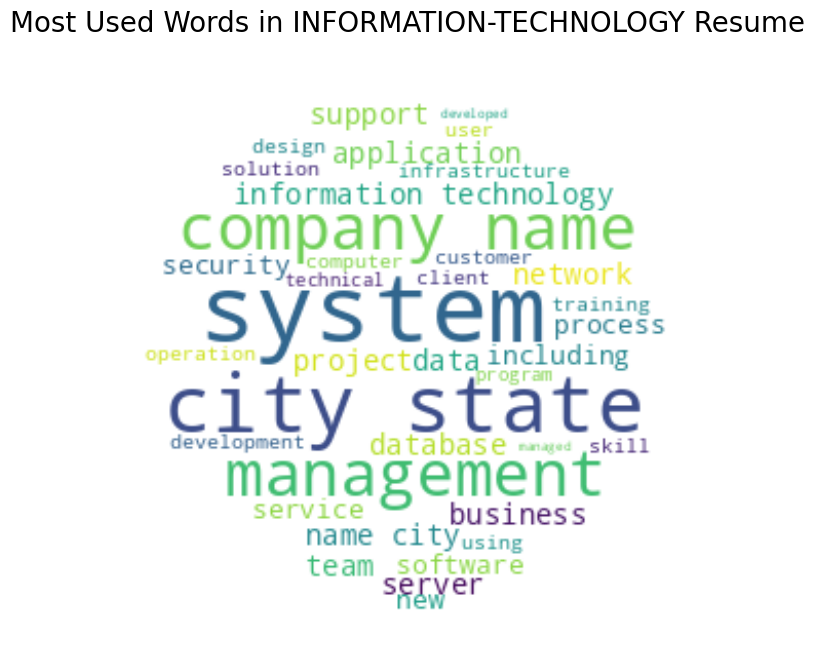

In [20]:
text = ""
for i in data[data["Category"] == Job_Category]["Clean_Resume"].values:
    text += i + " "

plt.figure(figsize=(8, 8))

x, y = np.ogrid[:300, :300]

mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(
    width=800,
    height=800,
    background_color="white",
    min_font_size=6,
    repeat=True,
    mask=mask,
)
wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.title(f"Most Used Words in {Job_Category} Resume", fontsize=20)

In [21]:
sent = nlp(data["Resume_str"].iloc[0])
displacy.render(sent, style="ent", jupyter=True)

In [22]:
displacy.render(sent[0:10], style="dep", jupyter=True, options={"distance": 90})

In [23]:
patterns = df.Category.unique()
for a in patterns:
    ruler.add_patterns([{"label": "Job-Category", "pattern": a}])

In [24]:
# options=[{"ents": "Job-Category", "colors": "#ff3232"},{"ents": "SKILL", "colors": "#56c426"}]
colors = {
    "Job-Category": "linear-gradient(90deg, #aa9cfc, #fc9ce7)",
    "SKILL": "linear-gradient(90deg, #9BE15D, #00E3AE)",
    "ORG": "#ffd966",
    "PERSON": "#e06666",
    "GPE": "#9fc5e8",
    "DATE": "#c27ba0",
    "ORDINAL": "#674ea7",
    "PRODUCT": "#f9cb9c",
}
options = {
    "ents": [
        "Job-Category",
        "SKILL",
        "ORG",
        "PERSON",
        "GPE",
        "DATE",
        "ORDINAL",
        "PRODUCT",
    ],
    "colors": colors,
}
sent = nlp(data["Resume_str"].iloc[5])
displacy.render(sent, style="ent", jupyter=True, options=options)

In [25]:
# Get the resume from the user
print("Please copy and paste your resume below:")
input_resume = input()

Please copy and paste your resume below:
Urdu English Punjabi Expertise Language Hobbies +9213-569149-5 Word-press HTML CSS JavaScript PHP Boot-Strap My SQL Swimming Football Basketball ahmedalix227@gmail.com 1691 House 89 St., I-14/3 Islamabad About Me AHMAD ALI Education Certificates Able to work well in teams as well as individually. My future goal is to become a full-Stack Developer Matriculation Intermediate (FSC) Islamabad Model School for boys I 14/3 Islamabad 2017 2019 Self-independent, reliable, and friendly individual who works hard to achieve his goals Islamabad Model Collage for boys I 10/1 Islamabad Bachelors of Science in Computer Science Riphah International University I 14/3 Islamabad Software Development Process and Methodologies (Coursera) Database Design and Diagramming in Dia (Coursera) Using Efficient Sorting Algo in Java to Arrange Data (Coursera) No SQL Database with mongoDB and Compass (Coursera) Fundamental of Graphic Design (Coursera)


In [26]:
# Display the resume to verify
print("\nUser's Resume:")
print(input_resume)


User's Resume:
Urdu English Punjabi Expertise Language Hobbies +9213-569149-5 Word-press HTML CSS JavaScript PHP Boot-Strap My SQL Swimming Football Basketball ahmedalix227@gmail.com 1691 House 89 St., I-14/3 Islamabad About Me AHMAD ALI Education Certificates Able to work well in teams as well as individually. My future goal is to become a full-Stack Developer Matriculation Intermediate (FSC) Islamabad Model School for boys I 14/3 Islamabad 2017 2019 Self-independent, reliable, and friendly individual who works hard to achieve his goals Islamabad Model Collage for boys I 10/1 Islamabad Bachelors of Science in Computer Science Riphah International University I 14/3 Islamabad Software Development Process and Methodologies (Coursera) Database Design and Diagramming in Dia (Coursera) Using Efficient Sorting Algo in Java to Arrange Data (Coursera) No SQL Database with mongoDB and Compass (Coursera) Fundamental of Graphic Design (Coursera)


In [27]:
sent2 = nlp(input_resume)
displacy.render(sent2, style="ent", jupyter=True, options=options)

In [34]:
print("Please Enter Skills below:")
input_skills = input()

Please Enter Skills below:
My SQL,graphic design,database design,java,software,sorting,database,compass,computer science,mongodb


In [35]:
print("\nSkills You Entered:")
print(input_skills)


Skills You Entered:
My SQL,graphic design,database design,java,software,sorting,database,compass,computer science,mongodb


In [36]:
req_skills = input_skills.lower().split(",")
resume_skills = unique_skills(get_skills(input_resume.lower()))
score = 0
for x in req_skills:
    if x in resume_skills:
        score += 1
req_skills_len = len(req_skills)
match = round(score / req_skills_len * 100, 1)

print(f"The current Resume is {match}% matched to your requirements")

The current Resume is 80.0% matched to your requirements


In [31]:
print(resume_skills)

['software', 'computer science', 'javascript', 'compass', 'database design', 'mongodb', 'graphic design', 'database', 'sorting']


In [32]:
docs = data["Clean_Resume"].values
dictionary = corpora.Dictionary(d.split() for d in docs)
bow = [dictionary.doc2bow(d.split()) for d in docs]
lda = gensim.models.ldamodel.LdaModel
num_topics = 4
ldamodel = lda(
    bow,
    num_topics=num_topics,
    id2word=dictionary,
    passes=50,
    minimum_probability=0
)
ldamodel.print_topics(num_topics=num_topics)

[(0,
  '0.013*"management" + 0.011*"company" + 0.010*"financial" + 0.010*"state" + 0.009*"business" + 0.008*"city" + 0.008*"account" + 0.008*"employee" + 0.007*"name" + 0.007*"process"'),
 (1,
  '0.012*"state" + 0.012*"company" + 0.011*"city" + 0.010*"sale" + 0.009*"marketing" + 0.008*"name" + 0.008*"student" + 0.007*"business" + 0.007*"development" + 0.006*"management"'),
 (2,
  '0.013*"project" + 0.013*"system" + 0.009*"management" + 0.007*"company" + 0.007*"state" + 0.007*"city" + 0.007*"design" + 0.006*"engineering" + 0.006*"name" + 0.005*"team"'),
 (3,
  '0.020*"customer" + 0.013*"state" + 0.012*"city" + 0.012*"service" + 0.011*"company" + 0.009*"name" + 0.008*"skill" + 0.007*"sale" + 0.006*"patient" + 0.005*"food"')]

In [33]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(ldamodel, bow, dictionary)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1      0.003014  0.130922       1        1  27.323622
0      0.003803 -0.008890       2        1  25.927930
3     -0.132233 -0.058002       3        1  23.824915
2      0.125416 -0.064031       4        1  22.923533, topic_info=           Term          Freq         Total Category  logprob  loglift
96     customer  11215.000000  11215.000000  Default  30.0000  30.0000
2934  financial   4278.000000   4278.000000  Default  29.0000  29.0000
492     project   7704.000000   7704.000000  Default  28.0000  28.0000
898   marketing   4343.000000   4343.000000  Default  27.0000  27.0000
282      system   7387.000000   7387.000000  Default  26.0000  26.0000
...         ...           ...           ...      ...      ...      ...
308        work   1299.153838   5020.290994   Topic4  -5.6082   0.1212
224     product   1240.207174   4695.211964   Topic4  -5.6547   0.1417
293    training   1228.809106   5425.893138   Topic4  -5.6639  -0.0121
63     business   1243.321046   8054.895803   Topic4  -5.6522  -0.3955
259     service   1235.971878   8794.802794   Topic4  -5.6581  -0.4893

[369 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3752      4  0.995090        3d
328       1  0.817957  academic
328       2  0.035344  academic
328       3  0.112764  academic
328       4  0.033661  academic
...     ...       ...       ...
308       1  0.159553      work
308       2  0.189431      work
308       3  0.392408      work
308       4  0.258750      work
2650      4  0.993565       xml

[732 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 1, 4, 3])